<div style="text-align:center">
    <h1>Predicción de precios de una laptop</h1>
</div>

### Cargando librerias

In [1]:
import pandas as pd

### Cargando datos

In [2]:
# Leer el archivo CSV
datos = pd.read_csv("C:/Users/ernes/OneDrive/Data/Laptop_price.csv")

# Mostrar las primeras filas del DataFrame
datos.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


### Agregando variable indicadora

In [3]:
# Convertir la columna 'Brand' a variables dummy
datos = pd.get_dummies(datos, columns=['Brand'], drop_first=True)

print(datos.head())
print("\n", datos.dtypes)

   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0         3.830296        16               512    11.185147  2.641094   
1         2.912833         4              1000    11.311372  3.260012   
2         3.241627         4               256    11.853023  2.029061   
3         3.806248        16               512    12.280360  4.573865   
4         3.268097        32              1000    14.990877  4.193472   

          Price  Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  
0  17395.093065           1           0         0             0  
1  31607.605919           0           0         0             0  
2   9291.023542           0           0         0             1  
3  17436.728334           0           0         0             0  
4  32917.990718           0           0         0             0  

 Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               flo

### Ajustando modelo de regresion lineal

In [4]:
import statsmodels.api as sm

# Definir las variables independientes y la variable dependiente
X = datos[['Brand_Asus', 'Brand_Dell', 'Brand_HP', 'Brand_Lenovo', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size']]
X = sm.add_constant(X)  # Añadir una constante para el intercepto
y = datos[['Price']]

# Ajustar el modelo de regresión lineal
model1 = sm.OLS(y, X).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.859e+05
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:41:04   Log-Likelihood:                -6695.3
No. Observations:                1000   AIC:                         1.341e+04
Df Residuals:                     991   BIC:                         1.345e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              514.2300     61.383      8.377      0.000     393.775     634.685
Brand_Asus          14.9637     19.455      0.769      0.442     -23.214      53.141
Brand_Dell         -17.7449     19.347     -0.917      0.359     -55.710      20.221
Brand_HP           -12.9330     19.860     -0.651      0.515     -51.905      26.039
Brand_Lenovo       -12.7744     19.827     -0.644      0.520     -51.683      26.134
Processor_Speed    199.2388      8.534     23.347      0.000     182.493     215.985
RAM_Size            50.4866      0.569     88.752      0.000      49.370      51.603
Storage_Capacity    29.9756      0.020   1505.094      0.000      29.937      30.015
Screen_Size         17.2075      3.653      4.710      0.000      10.038      24.377
==============================================================================
Omnibus:                        9.695   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.325
Skew:                           0.152   Prob(JB):                      0.00347
Kurtosis:                       3.424   Cond. No.                     6.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El numero de condicion podria indicar multicolinealidad, por lo que analizaremos la matriz de correlacion

### Matriz de correlacion

                  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.000000  0.021391         -0.067576    -0.013425   
RAM_Size                 0.021391  1.000000          0.002111    -0.036002   
Storage_Capacity        -0.067576  0.002111          1.000000    -0.027560   
Screen_Size             -0.013425 -0.036002         -0.027560     1.000000   
Weight                  -0.054603 -0.025382          0.041335     0.021995   
Price                   -0.050737  0.061237          0.997908    -0.026740   
Brand_Asus               0.036794 -0.056957          0.015291    -0.015131   
Brand_Dell              -0.029833  0.057449         -0.042828     0.013346   
Brand_HP                 0.028792 -0.049435         -0.009157    -0.025238   
Brand_Lenovo            -0.021813  0.034117          0.017856    -0.012171   

                    Weight     Price  Brand_Asus  Brand_Dell  Brand_HP  \
Processor_Speed  -0.054603 -0.050737    0.036794   -0.029833  0.028

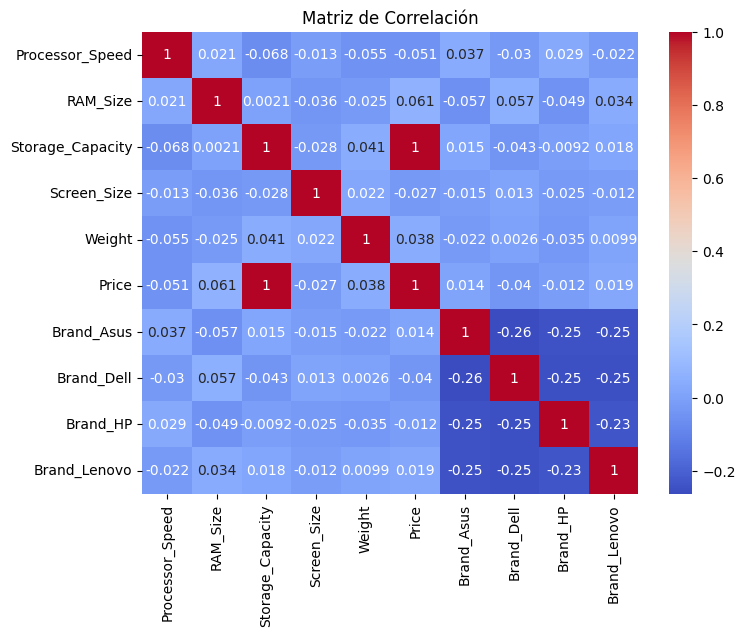

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = datos.corr()
print(corr_matrix)

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Existe una gran correlacion entre storage_capacity y price, sin embargo, esto indica que la variable independiente tiene un fuerte poder explicativo sobre la variable dependiente, asi que se quedara en el modelo. Debido a que las variables dummies de brand tiene pequeña significancia y estan un poco correlacionadas entre si, las eliminaremos del modelo

### Ahora encontremos un modelo para el cual no tomemos la variable regresora de Brand

In [6]:
X2 = datos[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size']]
X2 = sm.add_constant(X2) 
y = datos[['Price']]

model2 = sm.OLS(y, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.720e+05
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:41:16   Log-Likelihood:                -6697.1
No. Observations:                1000   AIC:                         1.340e+04
Df Residuals:                     995   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              507.3428     59.661      8.504      0.000     390.268     624.418
Processor_Speed    199.8439      8.518     23.460      0.000     183.128     216.560
RAM_Size            50.4237      0.566     89.043      0.000      49.312      51.535
Storage_Capacity    29.9769      0.020   1507.174      0.000      29.938      30.016
Screen_Size         17.2033      3.649      4.715      0.000      10.043      24.363
==============================================================================
Omnibus:                        8.959   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.113
Skew:                           0.154   Prob(JB):                      0.00637
Kurtosis:                       3.384   Cond. No.                     6.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se puede notar que el numero de condicion sigue siendo grande, esto podria deberse a que las variables
independientes están en diferentes escalas (por ejemplo, una variable es muy grande y otra muy pequeña),
esto puede contribuir a un número de condición alto. Por lo tanto, estandarizaremos los datos para que tengan media 0 y desviacion estandar 1.

### Estandarizacion

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Seleccionar solo las columnas para normalizar
columns_to_scale = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']

# Aplicar la estandarización
datos[columns_to_scale] = scaler.fit_transform(datos[columns_to_scale])
print(datos.head())


   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0         1.476128  0.045524         -0.231664    -1.684219 -0.953490   
1         0.221788 -1.047057          1.326040    -1.610189 -0.238893   
2         0.671310 -1.047057         -1.048819    -1.292510 -1.660138   
3         1.443251  0.045524         -0.231664    -1.041877  1.278069   
4         0.707499  1.502299          1.326040     0.547843  0.838871   

          Price  Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  
0  17395.093065           1           0         0             0  
1  31607.605919           0           0         0             0  
2   9291.023542           0           0         0             1  
3  17436.728334           0           0         0             0  
4  32917.990718           0           0         0             0  


### Ajuste de modelo con variables normalizadas

In [8]:
X2 = datos[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size']]
X2 = sm.add_constant(X2)  
y = datos[['Price']]

model2 = sm.OLS(y, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.720e+05
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:41:23   Log-Likelihood:                -6697.1
No. Observations:                1000   AIC:                         1.340e+04
Df Residuals:                     995   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.96e+04      6.214   3154.735      0.000    1.96e+04    1.96e+04
Processor_Speed    146.1719      6.231     23.460      0.000     133.945     158.398
RAM_Size           553.8119      6.220     89.043      0.000     541.607     566.017
Storage_Capacity  9391.2086      6.231   1507.174      0.000    9378.981    9403.436
Screen_Size         29.3321      6.221      4.715      0.000      17.124      41.540
==============================================================================
Omnibus:                        8.959   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.113
Skew:                           0.154   Prob(JB):                      0.00637
Kurtosis:                       3.384   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Con esto conclumos que el mejor modelo es tomar el modelo en donde solo se tomen las variables regresoras estandarizadas Processor_Speed, RAM_Size, Storage_Capacity y Screen_Size.
- Al parecer la variable Brand no tiene efecto, lo mas probables es que las marcas den la misma calidad del producto. 

# Comprobacion de supuestos

## Supuesto de normalidad

### Graficas de residuo

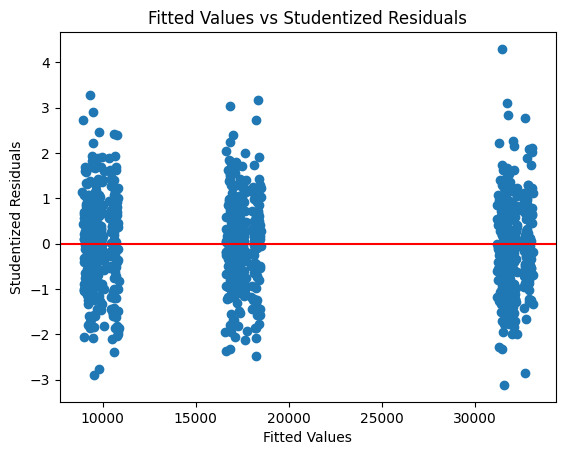

Media de los residuos: -7.566195209732563e-06


In [9]:
import matplotlib.pyplot as plt

# Obtener los valores ajustados y los residuos estudentizados
fitted_values = model2.fittedvalues
studentized_residuals = model2.get_influence().resid_studentized_internal

# Crear la gráfica
plt.scatter(fitted_values, studentized_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Fitted Values vs Studentized Residuals')
plt.show()

# Calcular y mostrar la media de los residuos
mean_residuals = studentized_residuals.mean()
print(f"Media de los residuos: {mean_residuals}")


### Graficas marginales

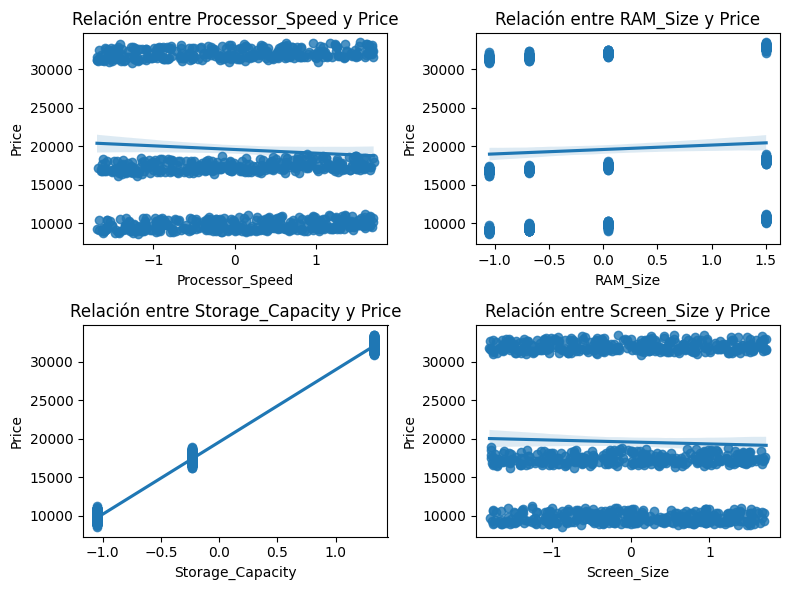

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos y modelo
X = datos[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size']]
y = datos['Price']

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2 filas, 2 columnas

# Lista de variables
variables = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size']
axes = axes.flatten()  # Aplanar el array de ejes

# Crear gráficos en cada subplot
for i, var in enumerate(variables):
    sns.regplot(x=var, y='Price', data=datos, ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Price')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')

plt.tight_layout()  # Ajustar el layout
plt.show()


# Supuesto de normalidad

### Grafica de probabilidad normal

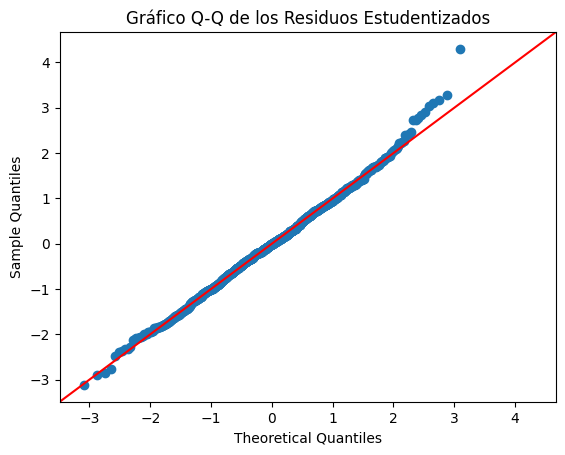

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Obtener los residuos estudentizados
studentized_residuals = model2.get_influence().resid_studentized_internal

# Crear el gráfico Q-Q
sm.qqplot(studentized_residuals, line='45')
plt.title('Gráfico Q-Q de los Residuos Estudentizados')
plt.show()

### Prueba de Kolmogorov-Smirnov (KS) 

In [12]:
from scipy.stats import kstest, norm

# Obtener los residuos del modelo
residuals = model2.resid

# Realizar la prueba KS
ks_stat, p_value = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"Estadístico KS: {ks_stat}")
print(f"Valor p: {p_value}")

Estadístico KS: 0.021701399207179284
Valor p: 0.7254274441234051


No se tiene suficiente evidencia para rechazar la hipotesis nula de normalidad de los residuos

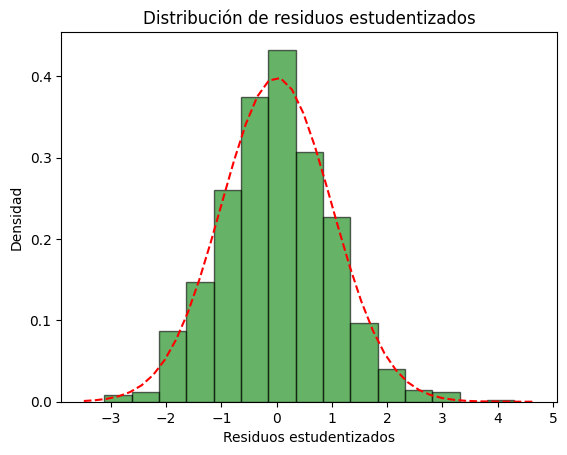

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Obtener los residuos estudentizados
studentized_residuals = model2.get_influence().resid_studentized_internal

# Crear el histograma de los residuos estudentizados
plt.hist(studentized_residuals, bins=15, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Distribución de residuos estudentizados")

# Ajustar la curva normal
xmin, xmax = plt.xlim()
xfit = np.linspace(xmin, xmax, 40)
yfit = norm.pdf(xfit, studentized_residuals.mean(), studentized_residuals.std())

# Superponer la curva de densidad normal
plt.plot(xfit, yfit, 'r--')

plt.xlabel('Residuos estudentizados')
plt.ylabel('Densidad')
plt.show()


Conclusion los residuos siguen una distribucion normal

## Supuesto de homocedasticidad

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Realizar la prueba de Breusch-Pagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(model2.resid, model2.model.exog)

print(f'Estadístico LM: {lm}')
print(f'Valor p LM: {lm_pvalue}')
print(f'Estadístico F: {fvalue}')
print(f'Valor p F: {f_pvalue}')

Estadístico LM: 1.740067058370931
Valor p LM: 0.7834271760818233
Estadístico F: 0.4335961671768963
Valor p F: 0.7844205314602661


No hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad, 
lo que significaría que los residuos tienen una varianza constante.

## Supuesto de independencia

In [15]:
from statsmodels.stats.stattools import durbin_watson

# Calcular el estadístico de Durbin-Watson
dw_statistic = durbin_watson(model2.resid)

print(f'Estadístico de Durbin-Watson: {dw_statistic}')

Estadístico de Durbin-Watson: 1.9634670627519535


Un valor de DW cercano a 2 sugiere que no hay autocorrelación.
Valores menores a 2 sugieren autocorrelación positiva.
Valores mayores a 2 sugieren autocorrelación negativa.
Por lo tanto, no existe correlacion entre las variables

- Nuesto modelo final, no viola los supuestos de Gauss - Markov